# Baseline Evaluation with Sklearn

In [15]:
%load_ext autoreload
%autoreload 2
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [16]:
def sklearn_to_df(data_loader):
    X_data = data_loader.data
    X_columns = data_loader.feature_names
    X = pd.DataFrame(X_data, columns=X_columns)

    y_data = data_loader.target
    label_names = data_loader.target_names
    y = pd.Series(y_data, name='target')

    return X, y, label_names

X, y, label_names = sklearn_to_df(load_breast_cancer())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
baseline_model = LogisticRegression(max_iter=100)
baseline_model.fit(X_train, y_train)

/Users/andy/miniconda3/envs/40.319/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [18]:
def evaluate(model):
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)

    print(f'Accuracy: {accuracy*100:.2f}%')

    disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=label_names)
    disp.plot(cmap=plt.cm.Blues)  # You can change the color map if you like
    plt.title('Confusion Matrix')
    plt.show()

def plot_losses(losses):
    plt.plot(losses)
    plt.title('Training Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.show()

Accuracy: 95.61%


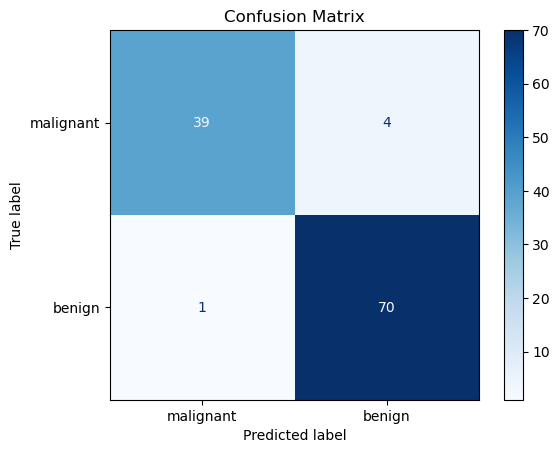

In [19]:
evaluate(baseline_model)

# Evaluating My Implementation

In [20]:
from logistic_regression import LogisticRegression as MyLogisticRegression

In [40]:
# set seed for reproducibility
np.random.seed(0)

my_model = MyLogisticRegression()
my_model.fit(X_train.values, y_train)

[Epoch 100/1000] Loss: 12.93496
[Epoch 200/1000] Loss: 3.32343
[Epoch 300/1000] Loss: 3.37494
[Epoch 400/1000] Loss: 10.7662
[Epoch 500/1000] Loss: 2.17328
[Epoch 600/1000] Loss: 2.27783
[Epoch 700/1000] Loss: 2.49438
[Epoch 800/1000] Loss: 2.68703
[Epoch 900/1000] Loss: 2.40905
[Epoch 1000/1000] Loss: 2.41401


Accuracy: 94.74%


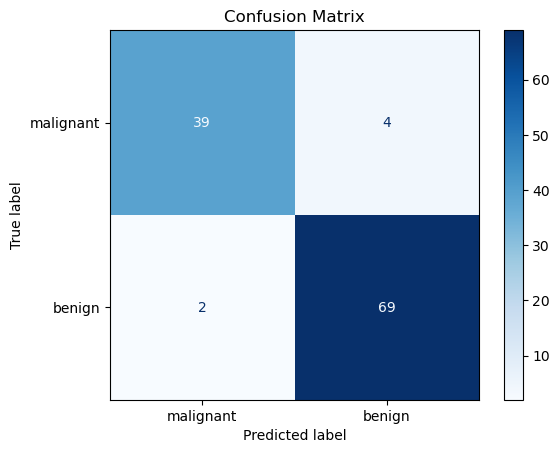

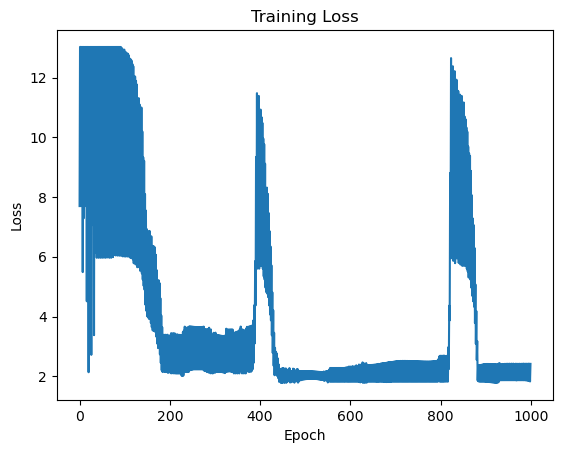

In [41]:
evaluate(my_model)
plot_losses(my_model.losses)

Our implementation is a success! However, notice that the LogisticRegression implemented by Sklearn converges much faster than our implementation. This is because it is using a solver called Limited-memory Broyden–Fletcher–Goldfarb–Shanno algorithm (LBFGS) which converges much faster than Gradient Descent (GD) which is what our implementation is using.

# Ackowledgements

A few resources that helped out:
- https://developer.ibm.com/articles/implementing-logistic-regression-from-scratch-in-python/
- https://medium.com/@koushikkushal95/logistic-regression-from-scratch-dfb8527a4226